<a href="https://colab.research.google.com/github/Vicrrs/training_a_custom_OCR/blob/main/Treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as Biblioteca

In [ ]:
import tensorflow
tensorflow.__version__

'2.9.2'

In [ ]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Conjunto MNIST 0-9

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_labels[0]

5

In [ ]:
digitos_data = np.vstack([train_data, test_data])
digitos_labels = np.hstack([train_labels, test_labels])

In [ ]:
digitos_data.shape

(70000, 28, 28)

In [ ]:
digitos_labels.shape

(70000,)

In [ ]:
digitos_labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
np.random.randint(0, digitos_data.shape[0])

24025

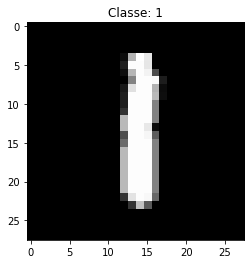

In [ ]:
indice = np.random.randint(0, digitos_data.shape[0])
plt.imshow(digitos_data[indice], cmap='gray')
plt.title('Classe: ' + str(digitos_labels[indice]));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


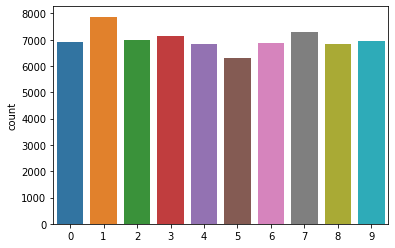

In [ ]:
sns.countplot(digitos_labels);

## Letras

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-02-06 11:29:33--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  60.6MB/s    in 3.0s    

2023-02-06 11:29:37 (60.6 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
zip_object = zipfile.ZipFile(file='/content/alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')

In [ ]:
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
alfabeto_data = dataset_az.drop('0', axis = 1)
alfabeto_labels = dataset_az['0']

In [ ]:
alfabeto_data.shape, alfabeto_labels.shape

((372450, 784), (372450,))

In [ ]:
alfabeto_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [ ]:
alfabeto_data = np.reshape(alfabeto_data.values, (alfabeto_data.shape[0], 28, 28))

In [ ]:
alfabeto_data.shape

(372450, 28, 28)

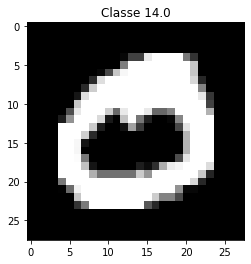

In [ ]:
indice = np.random.randint(0, alfabeto_data.shape[0])
plt.imshow(alfabeto_data[indice], cmap = 'gray')
plt.title('Classe ' + str(alfabeto_labels[indice]));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


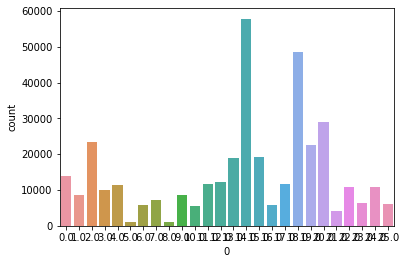

In [ ]:
sns.countplot(alfabeto_labels);

### Junção de base de dados

In [ ]:
digitos_labels, np.unique(digitos_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [ ]:
alfabeto_labels += 10

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [ ]:
data = np.vstack([alfabeto_data, digitos_data])
labels = np.hstack([alfabeto_labels, digitos_labels])

In [ ]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
data = np.array(data, dtype='float32')

In [ ]:
data.shape

(442450, 28, 28)

In [ ]:
data = np.expand_dims(data, axis = -1)

In [ ]:
data.shape

(442450, 28, 28, 1)

### Pré-processamento de dados

In [ ]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [ ]:
data /= 255.0

In [ ]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
labels[30000], len(labels[30000]), 26 + 10

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 36, 36)

In [ ]:
classes_total = labels.sum(axis=0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
classes_total.max()

57825

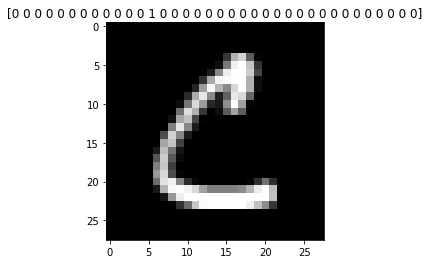

In [ ]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[30000]));

In [ ]:
classes_peso = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_peso[i] = classes_total.max() / classes_total[i]

In [ ]:
classes_peso

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state = 1)

In [ ]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

### Estrutural da rede neural

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
rede_neural = Sequential()

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(64, activation='relu'))
rede_neural.add(Dense(128, activation='relu'))

rede_neural.add(Dense(36, activation='softmax'))

rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
nomes_labels = '0123456789'
nomes_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
nomes_labels = [l for l in nomes_labels]

In [ ]:
print(nomes_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Treinamento da rede neural

In [ ]:
arquivo_modelo = 'manuscrito.model'
epochs = 20
batch_size = 128

In [ ]:
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
len(X_train) // batch_size

2765

In [ ]:
history = rede_neural.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                                            validation_data = (X_test, y_test),
                                            steps_per_epoch = len(X_train) // batch_size,
                                            epochs = epochs,
                                            class_weight = classes_peso,
                                            verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.1105 - accuracy: 0.8310
Epoch 1: val_loss improved from inf to 0.22483, saving model to manuscrito.model


2765/2765 [==============================] - 166s 60ms/step - loss: 2.1099 - accuracy: 0.8310 - val_loss: 0.2248 - val_accuracy: 0.9163
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0051 - accuracy: 0.9005
Epoch 2: val_loss did not improve from 0.22483
2765/2765 [==============================] - 130s 47ms/step - loss: 1.0051 - accuracy: 0.9005 - val_loss: 0.2876 - val_accuracy: 0.8770
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8296 - accuracy: 0.9128
Epoch 3: val_loss improved from 0.22483 to 0.21484, saving model to manuscrito.model


2765/2765 [==============================] - 130s 47ms/step - loss: 0.8294 - accuracy: 0.9128 - val_loss: 0.2148 - val_accuracy: 0.9137
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7488 - accuracy: 0.9197
Epoch 4: val_loss improved from 0.21484 to 0.20139, saving model to manuscrito.model


2765/2765 [==============================] - 128s 46ms/step - loss: 0.7488 - accuracy: 0.9197 - val_loss: 0.2014 - val_accuracy: 0.9175
Epoch 5/20
2765/2765 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.9255
Epoch 5: val_loss did not improve from 0.20139
2765/2765 [==============================] - 129s 47ms/step - loss: 0.6758 - accuracy: 0.9255 - val_loss: 0.2818 - val_accuracy: 0.8837
Epoch 6/20
2765/2765 [==============================] - ETA: 0s - loss: 0.6377 - accuracy: 0.9291
Epoch 6: val_loss did not improve from 0.20139
2765/2765 [==============================] - 128s 46ms/step - loss: 0.6377 - accuracy: 0.9291 - val_loss: 0.2272 - val_accuracy: 0.9077
Epoch 7/20
2765/2765 [==============================] - ETA: 0s - loss: 0.6006 - accuracy: 0.9321
Epoch 7: val_loss did not improve from 0.20139
2765/2765 [==============================] - 128s 46ms/step - loss: 0.6006 - accuracy: 0.9321 - val_loss: 0.3222 - val_accuracy: 0.8703
Epoch 8/20
2765/2765 

2765/2765 [==============================] - 128s 46ms/step - loss: 0.4728 - accuracy: 0.9430 - val_loss: 0.1769 - val_accuracy: 0.9246
Epoch 15/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4577 - accuracy: 0.9442
Epoch 15: val_loss did not improve from 0.17695
2765/2765 [==============================] - 126s 46ms/step - loss: 0.4576 - accuracy: 0.9442 - val_loss: 0.1956 - val_accuracy: 0.9270
Epoch 16/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4494 - accuracy: 0.9457
Epoch 16: val_loss improved from 0.17695 to 0.15255, saving model to manuscrito.model


2765/2765 [==============================] - 129s 47ms/step - loss: 0.4493 - accuracy: 0.9457 - val_loss: 0.1526 - val_accuracy: 0.9515
Epoch 17/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.9462
Epoch 17: val_loss did not improve from 0.15255
2765/2765 [==============================] - 128s 46ms/step - loss: 0.4384 - accuracy: 0.9462 - val_loss: 0.1774 - val_accuracy: 0.9301
Epoch 18/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.9467
Epoch 18: val_loss improved from 0.15255 to 0.15061, saving model to manuscrito.model


2765/2765 [==============================] - 130s 47ms/step - loss: 0.4291 - accuracy: 0.9467 - val_loss: 0.1506 - val_accuracy: 0.9447
Epoch 19/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.9479
Epoch 19: val_loss improved from 0.15061 to 0.13620, saving model to manuscrito.model


2765/2765 [==============================] - 128s 46ms/step - loss: 0.4284 - accuracy: 0.9479 - val_loss: 0.1362 - val_accuracy: 0.9538
Epoch 20/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4221 - accuracy: 0.9483
Epoch 20: val_loss did not improve from 0.13620
2765/2765 [==============================] - 126s 46ms/step - loss: 0.4220 - accuracy: 0.9483 - val_loss: 0.1494 - val_accuracy: 0.9467


### Avaliação da rede neural

In [ ]:
X_test.shape

(88490, 28, 28, 1)

In [ ]:
previsoes = rede_neural.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [ ]:
previsoes

array([[0.03318567, 0.02419009, 0.03396705, ..., 0.02638826, 0.02509178,
        0.0264707 ],
       [0.03046232, 0.02301466, 0.03602541, ..., 0.02811005, 0.02494835,
        0.02879814],
       [0.03400638, 0.02352085, 0.03629885, ..., 0.0256371 , 0.02565981,
        0.02668971],
       ...,
       [0.0375938 , 0.02094281, 0.03732918, ..., 0.02565085, 0.02349759,
        0.02617502],
       [0.0321169 , 0.0235782 , 0.03627956, ..., 0.02612795, 0.0261944 ,
        0.02620389],
       [0.03604596, 0.02226781, 0.03717178, ..., 0.02673522, 0.02405269,
        0.02560079]], dtype=float32)

In [ ]:
previsoes[0]

array([0.03318567, 0.02419009, 0.03396705, 0.02789472, 0.0357499 ,
       0.02596371, 0.02754795, 0.02865451, 0.02720172, 0.02903684,
       0.02643821, 0.02362421, 0.02574282, 0.02757589, 0.02564184,
       0.02877073, 0.03545603, 0.03053366, 0.02236224, 0.03121657,
       0.02527102, 0.018305  , 0.02883234, 0.03064984, 0.03222587,
       0.02268859, 0.0253936 , 0.02767621, 0.02703774, 0.021345  ,
       0.03047701, 0.03070653, 0.0306861 , 0.02638826, 0.02509178,
       0.0264707 ], dtype=float32)

In [ ]:
len(previsoes[0])

36

In [ ]:
np.argmax(previsoes[0])

4

In [ ]:
nomes_labels[24]

'O'

In [ ]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.argmax(y_test[0])

24

In [ ]:
nomes_labels[np.argmax(y_test[0])]

'O'

In [ ]:
rede_neural.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 3.5101 - accuracy: 0.0739


[3.5101068019866943, 0.07391795516014099]

In [ ]:
print(classification_report(y_test.argmax(axis=1), previsoes.argmax(axis=1), target_names=nomes_labels))

              precision    recall  f1-score   support

           0       0.06      0.06      0.06      1381
           1       0.00      0.00      0.00      1575
           2       0.00      0.02      0.00      1398
           3       0.00      0.00      0.00      1428
           4       0.03      0.98      0.06      1365
           5       0.00      0.00      0.00      1263
           6       0.00      0.00      0.00      1375
           7       0.54      0.18      0.27      1459
           8       0.00      0.00      0.00      1365
           9       0.00      0.00      0.00      1392
           A       0.00      0.00      0.00      2774
           B       0.00      0.00      0.00      1734
           C       0.00      0.00      0.00      4682
           D       0.00      0.00      0.00      2027
           E       0.00      0.00      0.00      2288
           F       0.00      0.00      0.00       233
           G       0.03      0.93      0.07      1152
           H       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

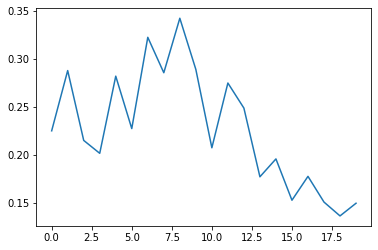

In [ ]:
plt.plot(history.history['val_loss']);  

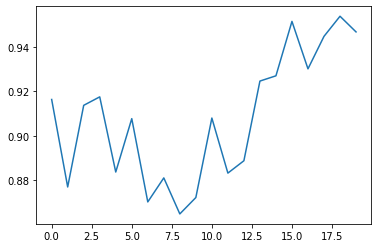

In [ ]:
plt.plot(history.history['val_accuracy']);

### Salvando no drive

In [ ]:
rede_neural.save('rede_neural', save_format='h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp rede_neural /content/drive/MyDrive/visão

### Testes em imagens

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
rede_neural_carregada = load_model('/content/drive/MyDrive/visão/rede_neural')

In [ ]:
rede_neural_carregada

In [ ]:
rede_neural_carregada.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

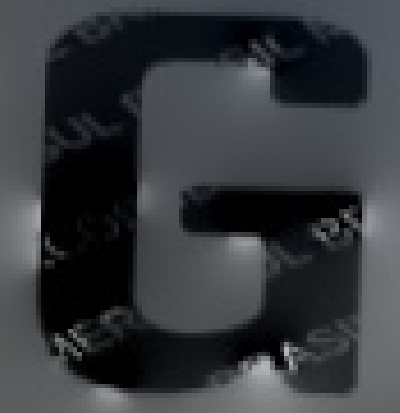

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/G (35).png')
cv2_imshow(img)

In [ ]:
img.shape

(413, 400, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(413, 400)

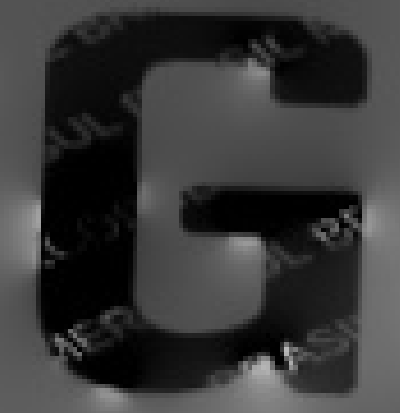

In [ ]:
cv2_imshow(gray)

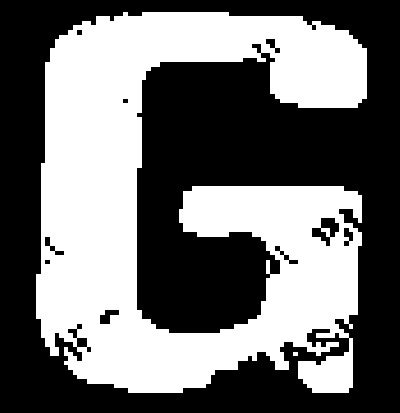

In [ ]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [ ]:
val

51.0

In [ ]:
thresh.shape


(413, 400)

In [ ]:
img = cv2.resize(thresh, (28, 28))
cv2_imshow(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [ ]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [ ]:
previsao = rede_neural_carregada.predict(img)

1/1 [==============================] - 0s 17ms/step


In [ ]:
previsao

array([[2.04332105e-06, 4.19201479e-06, 1.17619159e-02, 8.33806894e-07,
        1.83621759e-03, 7.08728767e-05, 2.72217894e-05, 4.23685095e-04,
        2.30361056e-03, 1.02709419e-05, 2.85475162e-05, 3.38258629e-04,
        1.24519365e-02, 2.56019849e-02, 2.07536742e-02, 2.09090849e-05,
        2.70390213e-01, 3.97292897e-03, 1.52496966e-02, 1.65936083e-01,
        4.74321103e-04, 4.86027310e-03, 2.35241692e-04, 4.22786223e-04,
        1.74765009e-02, 2.05807402e-04, 1.57833449e-03, 6.27622285e-05,
        2.21433826e-02, 1.80308491e-01, 3.57509553e-02, 7.37541654e-08,
        3.23204804e-05, 1.22162364e-02, 1.32671282e-01, 6.03761151e-02]],
      dtype=float32)

In [ ]:
np.argmax(previsao)

16

In [ ]:
nomes_labels[16]

'G'